<a href="https://colab.research.google.com/github/Suchi102005/Customer_segmentation/blob/main/Customer_Segmentation_using_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Segmentation using K-Means**

Submitted by : Narasingi Sai Suchendar

1. 📌 **Problem Statement**

E-commerce companies collect huge amounts of customer purchase data.
The challenge is to segment customers into groups (VIP, Regular, Churn-risk) so marketing teams can personalize offers and increase sales.

This is an Unsupervised Learning problem → because we don’t have predefined labels.
We use Clustering (K-Means) to group customers based on RFM features:

Recency (R): How recently a customer purchased.

Frequency (F): How often they purchase.

Monetary (M): How much money they spend.

2. 🔧** Tools & Libraries**

Python (main language)

pandas, numpy → data handling

matplotlib, seaborn → visualization

scikit-learn → scaling, PCA, clustering, evaluation

3. 📊 ***Step-by-Step Workflow***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Step 2: **Load Dataset**

In [ ]:
data = {
    'CustomerID': range(1, 16),
    'Recency': [5, 15, 25, 7, 3, 30, 22, 18, 45, 60, 10, 12, 55, 40, 28],
    'Frequency': [50, 40, 20, 60, 80, 15, 25, 30, 10, 5, 70, 65, 7, 12, 18],
    'Monetary': [500, 400, 200, 600, 800, 150, 250, 300, 100, 50, 700, 650, 70, 120, 180]
}
df = pd.DataFrame(data)


Step 3:** EDA (Exploratory Data Analysis)**

In [ ]:
print(df.info())       # dataset structure
print(df.describe())   # summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CustomerID  15 non-null     int64
 1   Recency     15 non-null     int64
 2   Frequency   15 non-null     int64
 3   Monetary    15 non-null     int64
dtypes: int64(4)
memory usage: 612.0 bytes
None
       CustomerID    Recency  Frequency    Monetary
count   15.000000  15.000000  15.000000   15.000000
mean     8.000000  25.000000  33.800000  338.000000
std      4.472136  18.015866  25.185597  251.855968
min      1.000000   3.000000   5.000000   50.000000
25%      4.500000  11.000000  13.500000  135.000000
50%      8.000000  22.000000  25.000000  250.000000
75%     11.500000  35.000000  55.000000  550.000000
max     15.000000  60.000000  80.000000  800.000000


**Visualizations:**

<Axes: ylabel='Monetary'>

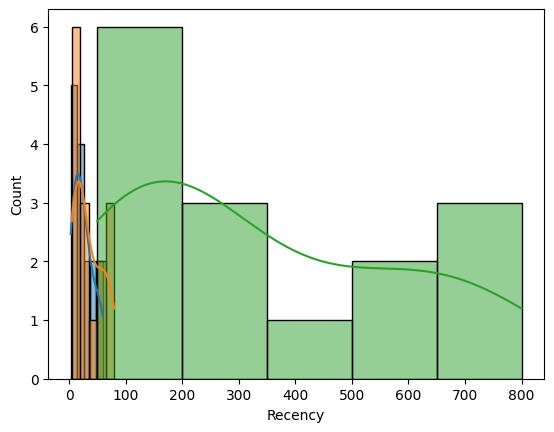

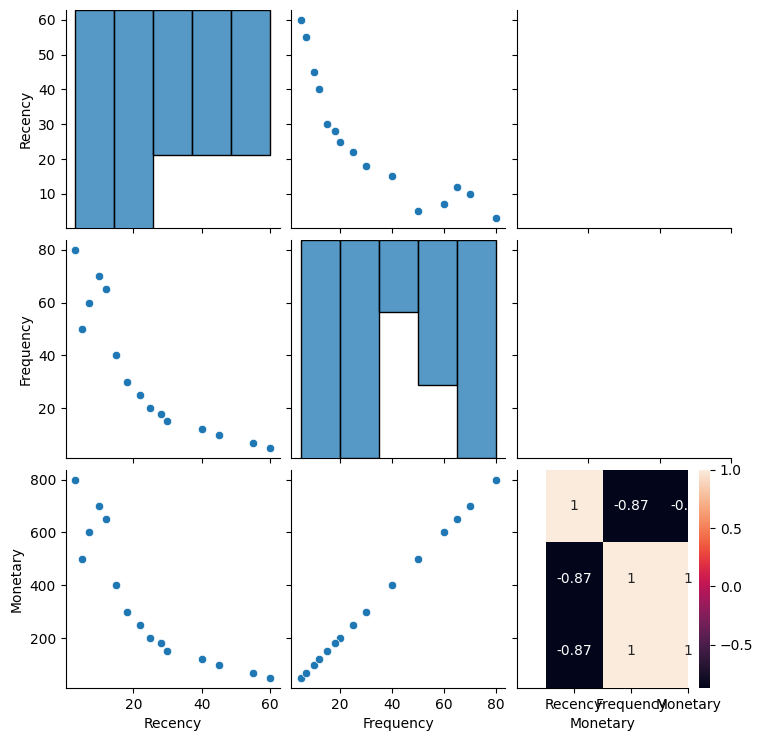

In [ ]:
# Distributions
sns.histplot(df['Recency'], kde=True)
sns.histplot(df['Frequency'], kde=True)
sns.histplot(df['Monetary'], kde=True)

# Pairplot
sns.pairplot(df[['Recency','Frequency','Monetary']])

# Correlation Heatmap
sns.heatmap(df[['Recency','Frequency','Monetary']].corr(), annot=True)

# Boxplots (outliers)
sns.boxplot(y=df['Monetary'])


Step 4:** Preprocessing (Scaling)**

In [ ]:
X = df.drop("CustomerID", axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Step 5: **Dimensionality Reduction (PCA)**

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.94265546 0.05734454]


Step 6:** Find Optimal Number of Clusters**

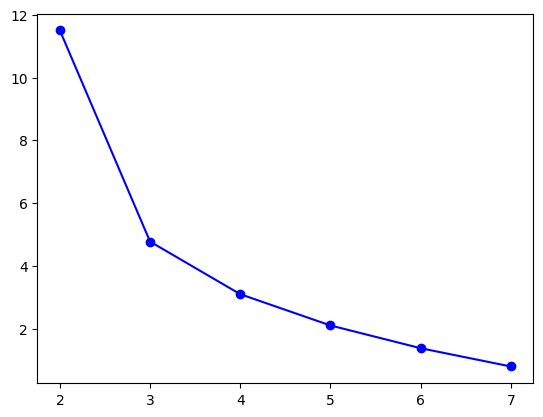

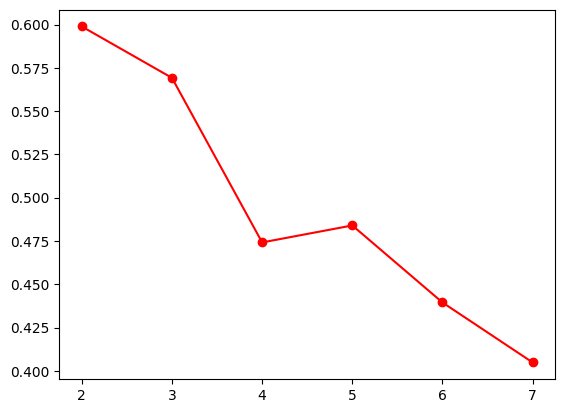

In [ ]:
wcss = []
silhouette_scores = []
K = range(2, 8)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Elbow Plot
plt.plot(K, wcss, 'bo-')
plt.show()

# Silhouette Plot
plt.plot(K, silhouette_scores, 'ro-')
plt.show()


Step 7: **Apply K-Means Clustering**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_pca)


Step 8:** Visualization**

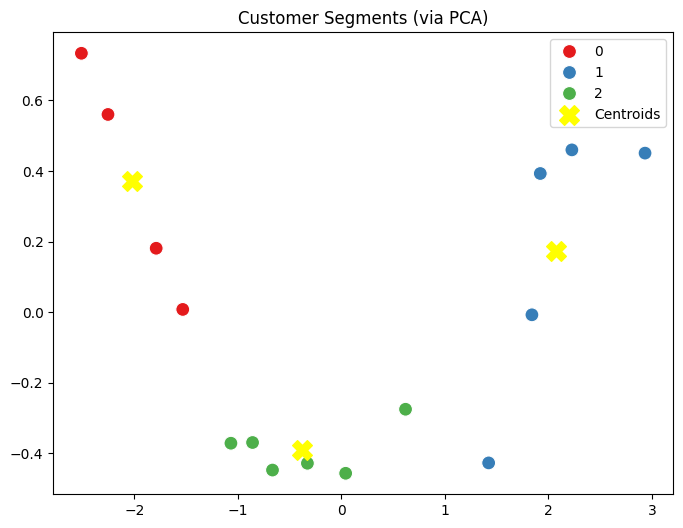

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette="Set1", s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='yellow', marker='X', label='Centroids')
plt.title("Customer Segments (via PCA)")
plt.legend()
plt.show()


Step 9: **Insights**

In [ ]:
print(df.groupby("Cluster")[['Recency','Frequency','Monetary']].mean())


         Recency  Frequency    Monetary
Cluster                                
0           50.0   8.500000   85.000000
1            7.4  65.000000  650.000000
2           23.0  24.666667  246.666667


**Conclusion**

We successfully built a Customer Segmentation model using K-Means clustering.

EDA revealed customer patterns.

Scaling + PCA ensured fair clustering & visualization.

Cluster insights provide actionable strategies for business growth.